# Evaluation Framework: Naive Forecast

Let’s establish a baseline forecast performance which we can use as a point of reference while evaluating the performance of different techniques. We can improve the model if its accuracy is as at par or below the baseline, in case we fail to achieve the desired accuracy, we can explore other techniques.


The most common baseline method for time series forecasting is the Naive forecast, this is simply the latest value of the series that is available at the time of prediction. The naive algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1).

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## Reframe time series data as supervised learning dataset

Let's transform our ‘airline-passengers’ dataset into a supervised learning problem, we can achieve this by creating a lag feature. In this transformed dataset, values at (t) are predictors (X) and values at (t+1) are the target variable (Y).

In [2]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
raw_df = pd.read_csv(url, header=0, parse_dates=True)
raw_df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# create lag feature
df = raw_df.copy().drop(["Month"], axis=1)
df.columns = ["t"]
df["t+1"] = df.shift(-1)
df.iloc[90:120]

,t,t+1
90,413,405.0
91,405,355.0
92,355,306.0
93,306,271.0
94,271,306.0
95,306,315.0
96,315,301.0
97,301,356.0
98,356,348.0
99,348,355.0


## Create Train-Test Split

Next, we can split the dataset into training and test subsets as below. 70% of the series created as training and 30% as a test subset.


In [4]:
# train test split
train_size = int(df.shape[0] * 0.7)

train = df.iloc[:train_size-1]
test = df.iloc[train_size-1:]

train_X = train.loc[:,"t"]
train_y = train.loc[:,"t+1"]

test_X = test.loc[:,"t"]
test_y = test.loc[:,"t+1"]

## Develop a Naive Forecast

It’s fairly simple to set up a baseline model. We know the naive algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). Therefore, in our transformed supervised version of the dataset, the first column is the prediction for the second column. We have to discard the last row of the dataset as it doesn’t have any input value.

In [5]:
# create baseline model (Naive model)
def model_persistence(x):
  return x

## Predict and Evaluate Forecast

As a final step, we can evaluate our baseline model on the test dataset. In this case, no model training or retraining is required, we know the first column is prediction and the second column is the actual number. We walk through the test dataset time step by time step and get predictions.

In [6]:
# walk-forward validation
predicted = list()
for x in test_X:
  yhat = model_persistence(x)
  predicted.append(yhat)
predicted = pd.Series(np.array(predicted))
predicted.index = test_y.index

# Root Mean Squared Error (RMSE)
rmse = np.mean((predicted - test_y)**2)**.5
print("Test RMSE: {:.3f}".format(rmse))

Test RMSE: 49.409


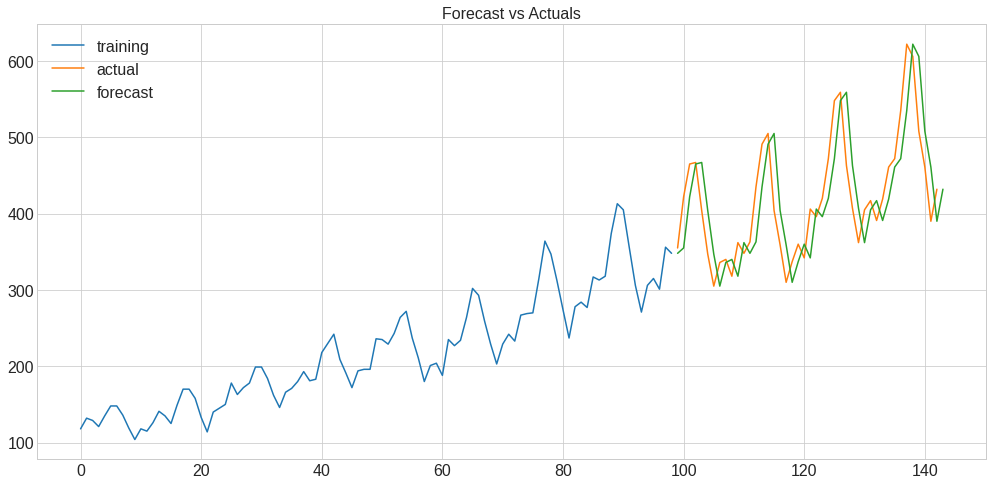

In [7]:
# Plot
plt.figure(figsize=(17,8))

plt.plot(train_y, label='training')
plt.plot(test_y, label='actual')
plt.plot(predicted, label='forecast')

plt.title('Forecast vs Actuals', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Looking at the line plot we can see a decent prediction on the test dataset. We have to maintain or improve this accuracy when we explore other advanced techniques.